<a href="https://colab.research.google.com/github/hsreekumar/Data_capstone/blob/main/Stock_News_Data/Model%20Exploration/Stock_News_Explore_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Sentiment Analysis using news headlines.

# Data set

Daily News for Stock Market Prediction
https://www.kaggle.com/datasets/aaron7sun/stocknews

We will predict whether the stock price for a given stock will raise or drop based on the related news headlines.

# Topic Covered

Classifiers: Random Forest , Naive Bayes, LSTM, GRU, BERT

Feature Transformation: Count Vectorizer vs TF-IDF Vectorizer

![](https://media-exp1.licdn.com/dms/image/C5112AQFKtWwV4Gd2Lg/article-cover_image-shrink_600_2000/0/1549570474712?e=1654128000&v=beta&t=jPyk2pQW6L1bxbYJlpzve_BuRwGjoOUhxl5GUDK8Eac)


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Encoding are in general UTF-8(default setting), Latin-1 (also known as ISO-8859-1) or Windows-1251
df=pd.read_csv('Combined_News_DJIA.csv', encoding = "ISO-8859-1")


# Data Inspection
First, let's have a look at our data set...
It seems our data is made of different news headlines related to a company and a label of wether the companies'stock price will increase or decrease.(0:decrease, 1: increase)

In [2]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

# Train-Test Split

In time series problems, old data are used to predict later data. Therefore, we set test data to be the latest data.

In [3]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

# Feature Transformation
**Text Preprocessing Functions**

Clean Text: Strips out non-alphabetical characters and converts the text to lowercase.

Tokenize and Remove Stopwords: Splits the text into individual words and removes common stopwords like "the" and "and."

Stem and Lemmatize: Reduces words to their root forms, making variations like "running" and "runs" into "run."

**Preprocess Headlines**

Combine Headlines: Gathers multiple headlines from a single day into one continuous text string.

Apply Preprocessing: Cleans, tokenizes, and normalizes the combined text, preparing it for further analysis.

# Count Vectorizer
Count Vectorizer will represent words by numbers so that they can be processed by algorithms. This is done by making each unique word a column and count the number of times each word appear and then make it the row values. An example is given below.

![](https://www.educative.io/api/edpresso/shot/5197621598617600/image/6596233398321152)

ngram is set as 2,2 so that pairs of words appearing together are used as features (columns)
If we set (1, 1) means only unigrams(sngle words), (1, 2) means unigrams and bigrams(2 words), and (2, 2) means only bigrams.

In [4]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


# Preprocessing functions
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Replace non-alphabet characters with spaces
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    return text

def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return words

def stem_and_lemmatize(words):
    stemmed = [ps.stem(word) for word in words]
    lemmatized = [lemmatizer.lemmatize(word) for word in stemmed]
    return lemmatized

def preprocess_headline(headline):
    cleaned = clean_text(headline)
    tokens = tokenize_and_remove_stopwords(cleaned)
    normalized = stem_and_lemmatize(tokens)
    return " ".join(normalized)
# Encoding are in general UTF-8(default setting), Latin-1 (also known as ISO-8859-1) or Windows-1251
df=pd.read_csv('Combined_News_DJIA.csv', encoding = "ISO-8859-1")

train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

# Preprocess the training headlines
data_train = train.iloc[:, 2:27]
data_train.columns = [str(i) for i in range(25)]

train_headlines = []
for row in range(0, len(data_train.index)):
    combined_headlines = ' '.join(str(x) for x in data_train.iloc[row, 0:25])
    preprocessed_headline = preprocess_headline(combined_headlines)
    train_headlines.append(preprocessed_headline)



# Preprocess the testing headlines
data_test = test.iloc[:, 2:27]
data_test.columns = [str(i) for i in range(25)]
test_headlines = []
for row in range(0, len(data_test.index)):
    combined_headlines = ' '.join(str(x) for x in data_test.iloc[row, 0:25])
    preprocessed_headline = preprocess_headline(combined_headlines)
    test_headlines.append(preprocessed_headline)

# Create the target labels
y_train = train['Label'].values
y_test = test['Label'].values

# Create Bag of Words representation with bigrams
countvector = CountVectorizer(ngram_range=(2, 2))
X_train = countvector.fit_transform(train_headlines)
X_test = countvector.transform(test_headlines)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Print a sample of the preprocessed headlines and their Bag of Words representation
print("\nSample of preprocessed headlines:")
print(train_headlines[:2])
print("\nBag of Words representation (feature names):")
print(countvector.get_feature_names_out()[:10])  # Displaying first 10 feature names for brevity
print("\nBag of Words representation (dense matrix):")
print(X_train.toarray()[:2])  # Displaying first 2 rows for brevity


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Training set shape: (1863, 374550)
Testing set shape: (378, 374550)

Sample of preprocessed headlines:
['b georgia down two russian warplan countri move brink war b break musharraf impeach b russia today column troop roll south ossetia footag fight youtub b russian tank move toward capit south ossetia reportedli complet destroy georgian artilleri fire b afghan child rape impun u n offici say sick three year old rape noth b russian tank enter south ossetia whilst georgia shoot two russian jet b break georgia invad south ossetia russia warn would interven side b enemi combat trial noth sham salim haman sentenc year kept longer anyway feel like b georgian troop retreat osettain capit presum leav sever hundr peopl kill video b u prep georgia war russia b rice give green light israel attack iran say u veto isra militari op b announc class action lawsuit behalf american public fbi b russia georgia war nyt top stori open ceremoni olymp fuck disgrac yet proof declin journal b china tell bush s

# Model - RandomForest
RandomForest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity. It works by creating a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/Random_forest_diagram_complete.png/220px-Random_forest_diagram_complete.png)

The parameters for our classifier are as follow:
* n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower.
* crierion : This is how each node of the tree is selected. There are 2 options:
  * gini: much faster
  * entropy: obtained results are slightly better


In [5]:
# implement RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
randomclassifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
randomclassifier.fit(X_train,y_train)# implement RandomForest Classifier

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [6]:
predictions = randomclassifier.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

matrix=confusion_matrix(y_test,predictions)
print(matrix)
score=accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[141  45]
 [ 21 171]]
0.8253968253968254
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       186
           1       0.79      0.89      0.84       192

    accuracy                           0.83       378
   macro avg       0.83      0.82      0.82       378
weighted avg       0.83      0.83      0.82       378



# TF-IDF
TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. It measures the relative importance of words by comparing the no. of times a word appear in a sample with the number of samples with that word.

This time the vectors are made up of the TF-IDFs of the words in the headings.


In [13]:
## implement BAG OF WORDS
tfidfvector=TfidfVectorizer(ngram_range=(2,2))
traindataset=tfidfvector.fit_transform(train_headlines)

In [18]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=20,criterion='entropy')
randomclassifier.fit(traindataset,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

Evaluation for Random Forest + TF-IDF

In [19]:
test_dataset = tfidfvector.transform(test_headlines)
predictions = randomclassifier.predict(test_dataset)
matrix=confusion_matrix(y_test,predictions)
print(matrix)
score=accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[139  47]
 [ 23 169]]
0.8148148148148148
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       186
           1       0.78      0.88      0.83       192

    accuracy                           0.81       378
   macro avg       0.82      0.81      0.81       378
weighted avg       0.82      0.81      0.81       378



# Model - Naive Bayes

Naive Bayes is another algorithm based on the Bayes Theorem for calculating probabilities and conditional probabilities. It can be extremely fast relative to other classification algorithms.


In [8]:
naive=MultinomialNB()
naive.fit(X_train,y_train)

MultinomialNB()

# Evaluation for NB + TF-IDF

In [9]:
predictions = naive.predict(X_test)
matrix=confusion_matrix(y_test,predictions)
print(matrix)
score=accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[143  43]
 [ 26 166]]
0.8174603174603174
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       186
           1       0.79      0.86      0.83       192

    accuracy                           0.82       378
   macro avg       0.82      0.82      0.82       378
weighted avg       0.82      0.82      0.82       378



# Advanced Models

**Word2Vec embedding**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import gensim.downloader as api

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_headlines)
sequences = tokenizer.texts_to_sequences(train_headlines)
word_index = tokenizer.word_index
MAX_SEQUENCE_LENGTH = max(len(seq) for seq in sequences)
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Sample target labels (replace with your actual labels)
y_train = train['Label'].values

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, y_train, test_size=0.2, random_state=42)

# Load pre-trained Word2Vec embeddings
word2vec = api.load("word2vec-google-news-300")


[==================================================] 100.0% 1662.8/1662.8MB downloaded


# LSTM

In [ ]:
embedding_dim = word2vec.vector_size
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    if word in word2vec:
        embedding_matrix[i] = word2vec[word]

def stack_model(layer_name, epochs=50):
    SEED = 42
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

    model = Sequential()
    model.add(Embedding(input_dim=len(word_index) + 1,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=MAX_SEQUENCE_LENGTH,
                        trainable=False))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(64))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer="adam", metrics=['accuracy'])
    model.summary()

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, callbacks=[early_stopping])
    return model

# Example usage with LSTM layers
model = stack_model(LSTM, epochs=50)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │       6,314,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,314,100 (24.09 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,314,100 (24.09 MB)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.4622 - loss: 0.7016 - val_accuracy: 0.5871 - val_loss: 0.6826
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5382 - loss: 0.6918 - val_accuracy: 0.5791 - val_loss: 0.6846
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5553 - loss: 0.6783 - val_accuracy: 0.5871 - val_loss: 0.6833
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5868 - loss: 0.6635 - val_accuracy: 0.5389 - val_loss: 0.7110
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6431 - loss: 0.6371 - val_accuracy: 0.5442 - val_loss: 0.7830
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6945 - loss: 0.5888 - val_accuracy: 0.5013 - val_loss: 0.7482
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7423 - loss: 0.5344 - val_accuracy: 0.5308 - val_loss: 0.8011
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7870 - loss: 0.4765 - val_accuracy: 0.5067 - v

In [ ]:
# Predict for the test dataset
test_transform = []
for row in range(0, len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row, 2:27]))

test_sequences = tokenizer.texts_to_sequences(test_headlines)
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Predict for the test dataset
predictions = model.predict(test_data)

predicted_labels = np.argmax(predictions, axis=1)
matrix = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:\n", matrix)
score = accuracy_score(y_test, predicted_labels)
print("Accuracy Score:", score)
report = classification_report(y_test, predicted_labels)
print("Classification Report:\n", report)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Confusion Matrix:
 [[144  42]
 [ 68 124]]
Accuracy Score: 0.708994708994709
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.77      0.72       186
           1       0.75      0.65      0.69       192

    accuracy                           0.71       378
   macro avg       0.71      0.71      0.71       378
weighted avg       0.71      0.71      0.71       378



# GRU

In [ ]:



for word, i in word_index.items():
    if word in word2vec:
        embedding_matrix[i] = word2vec[word]


def stack_model(layer_name, epochs=50):
    SEED = 42
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

    model = Sequential()
    model.add(Embedding(input_dim=len(word_index) + 1,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=MAX_SEQUENCE_LENGTH,
                        trainable=False))
    model.add(GRU(128, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(GRU(64))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer="adam", metrics=['accuracy'])
    model.summary()

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, callbacks=[early_stopping])
    return model

# Example usage with GRU layers
model = stack_model(GRU, epochs=50)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │       6,314,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,314,100 (24.09 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,314,100 (24.09 MB)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.4910 - loss: 0.7052 - val_accuracy: 0.5898 - val_loss: 0.6800
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5412 - loss: 0.6868 - val_accuracy: 0.5818 - val_loss: 0.6772
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5936 - loss: 0.6725 - val_accuracy: 0.5630 - val_loss: 0.6813
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6198 - loss: 0.6435 - val_accuracy: 0.5871 - val_loss: 0.6896
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6627 - loss: 0.6132 - val_accuracy: 0.5603 - val_loss: 0.7212
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6965 - loss: 0.5770 - val_accuracy: 0.5335 - val_loss: 0.7462
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7414 - loss: 0.5200 - val_accuracy: 0.5603 - val_loss: 0.7888
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7880 - loss: 0.4619 - val_accuracy: 0.5362 - v

In [ ]:
# Predict for the test dataset
test_transform = []
for row in range(0, len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row, 2:27]))

test_sequences = tokenizer.texts_to_sequences(test_headlines)
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Predict for the test dataset
predictions = model.predict(test_data)

predicted_labels = np.argmax(predictions, axis=1)
matrix = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:\n", matrix)
score = accuracy_score(y_test, predicted_labels)
print("Accuracy Score:", score)
report = classification_report(y_test, predicted_labels)
print("Classification Report:\n", report)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Confusion Matrix:
 [[144  42]
 [ 68 124]]
Accuracy Score: 0.708994708994709
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.77      0.72       186
           1       0.75      0.65      0.69       192

    accuracy                           0.71       378
   macro avg       0.71      0.71      0.71       378
weighted avg       0.71      0.71      0.71       378



# Dense Model

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


vectorizer = TfidfVectorizer(ngram_range=(2,2))
traindataset = vectorizer.fit_transform(train_headlines)

# Convert the sparse matrix to a dense format
X_train = traindataset.toarray()

# Sample target labels (replace with your actual labels)
y_train = train['Label'].values

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Define the model
def stack_model(layer_name, epochs=50):
    SEED = 42
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

    INPUT_DIM = X_train.shape[1]  # Number of features (ngrams)
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(INPUT_DIM,)))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer="adam", metrics=['accuracy'])
    model.summary()

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, callbacks=[early_stopping])
    return model

# Example usage with Dense layers
model = stack_model(Dense, epochs=50)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 512)                 │     191,770,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 191,934,594 (732.17 MB)

 Trainable params: 191,934,594 (732.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - accuracy: 0.4864 - loss: 0.6935 - val_accuracy: 0.5871 - val_loss: 0.6828
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7250 - loss: 0.5116 - val_accuracy: 0.4772 - val_loss: 0.9521
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9941 - loss: 0.0124 - val_accuracy: 0.4424 - val_loss: 1.3660
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 1.0000 - loss: 7.8675e-04 - val_accuracy: 0.5228 - val_loss: 1.1049
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 1.0000 - loss: 1.4333e-04 - val_accuracy: 0.5201 - val_loss: 1.1007
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 1.0000 - loss: 5.6416e-05 - val_accuracy: 0.4960 - val_loss: 1.0951
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 1.0000 - loss: 2.2622e-04 - val_accuracy: 0.5174 - val_loss: 1.1133
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 1.0000 - loss: 2.7539e-05 - va

In [ ]:
# Predict for the test dataset
test_transform = []
for row in range(0, len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row, 2:27]))
test_dataset = vectorizer.transform(test_headlines)

# Convert the sparse matrix to a dense format
test_dataset = test_dataset.toarray()  # Convert to dense array

predictions = model.predict(test_dataset)

predicted_labels = np.argmax(predictions, axis=1)
matrix = confusion_matrix(test['Label'], predicted_labels)
print("Confusion Matrix:\n", matrix)
score = accuracy_score(test['Label'], predicted_labels)
print("Accuracy Score:", score)
report = classification_report(test['Label'], predicted_labels)
print("Classification Report:\n", report)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
Confusion Matrix:
 [[138  48]
 [ 44 148]]
Accuracy Score: 0.7566137566137566
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       186
           1       0.76      0.77      0.76       192

    accuracy                           0.76       378
   macro avg       0.76      0.76      0.76       378
weighted avg       0.76      0.76      0.76       378



# HuggingFace Models

# FinBERT

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

Training set shape: 1863
Testing set shape: 378

Sample of preprocessed headlines and predicted sentiments (train):
Headline: b georgia down two russian warplan countri move brink war b break musharraf impeach b russia today column troop roll south ossetia footag fight youtub b russian tank move toward capit south ossetia reportedli complet destroy georgian artilleri fire b afghan child rape impun u n offici say sick three year old rape noth b russian tank enter south ossetia whilst georgia shoot two russian jet b break georgia invad south ossetia russia warn would interven side b enemi combat trial noth sham salim haman sentenc year kept longer anyway feel like b georgian troop retreat osettain capit presum leav sever hundr peopl kill video b u prep georgia war russia b rice give green light israel attack iran say u veto isra militari op b announc class action lawsuit behalf american public fbi b russia georgia war nyt top stori open ceremoni olymp fuck disgrac yet proof declin journa

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


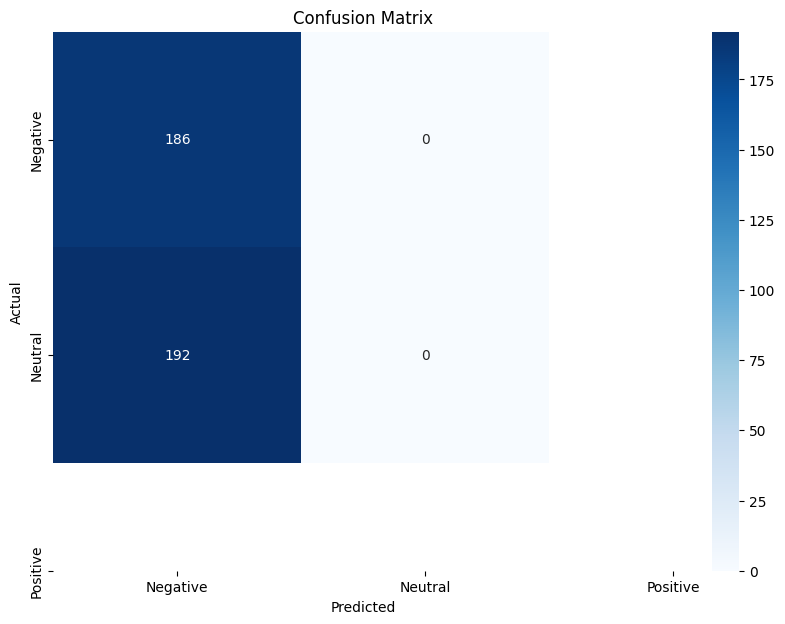


Accuracy: 0.49


In [ ]:
import pandas as pd
import re
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt



# Load FinBERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
model = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')

# Function to get sentiment
def get_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return torch.argmax(probs, dim=1).item()

# Predict sentiments for train and test datasets
train_labels = [get_sentiment(headline) for headline in train_headlines]
test_labels = [get_sentiment(headline) for headline in test_headlines]

# True labels
y_train_true = train['Label'].tolist()
y_test_true = test['Label'].tolist()

# Print results
print("Training set shape:", len(train_headlines))
print("Testing set shape:", len(test_headlines))

# Print a sample of the preprocessed headlines and their predicted sentiments
print("\nSample of preprocessed headlines and predicted sentiments (train):")
for i in range(2):
    print(f"Headline: {train_headlines[i]}")
    print(f"Predicted Sentiment: {train_labels[i]}")

print("\nSample of preprocessed headlines and predicted sentiments (test):")
for i in range(2):
    print(f"Headline: {test_headlines[i]}")
    print(f"Predicted Sentiment: {test_labels[i]}")

# Compute and print confusion matrix and classification report
print("\nConfusion Matrix (test):")
cm = confusion_matrix(y_test_true, test_labels)
print(cm)

print("\nClassification Report (test):")
print(classification_report(y_test_true, test_labels))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test_true, test_labels)
print(f"\nAccuracy: {accuracy:.2f}")


# BertForSequenceClassification Model

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/15
----------
Train loss 0.6992248877500876 accuracy 0.5195920558239399
Val loss 0.6937656700611115 accuracy 0.5052910052910052
Epoch 2/15
----------
Train loss 0.6920440298879248 accuracy 0.5432098765432098
Val loss 0.6813469032446543 accuracy 0.6322751322751322
Epoch 3/15
----------
Train loss 0.6851046798575637 accuracy 0.5523349436392915
Val loss 0.6454304481546084 accuracy 0.6216931216931216
Epoch 4/15
----------
Train loss 0.6284506364255888 accuracy 0.6403650026838432
Val loss 0.5478065051138401 accuracy 0.7222222222222222
Epoch 5/15
----------
Train loss 0.5400365588501987 accuracy 0.7337627482555019
Val loss 0.49391152895987034 accuracy 0.783068783068783
Epoch 6/15
----------
Train loss 0.44640614525375205 accuracy 0.8040794417606012
Val loss 0.47373317927122116 accuracy 0.8042328042328042
Epoch 7/15
----------
Train loss 0.3812278928155573 accuracy 0.8475577026301664
Val loss 0.43606942736854154 accuracy 0.8359788359788359
Epoch 8/15
----------
Train loss 0.3046378135

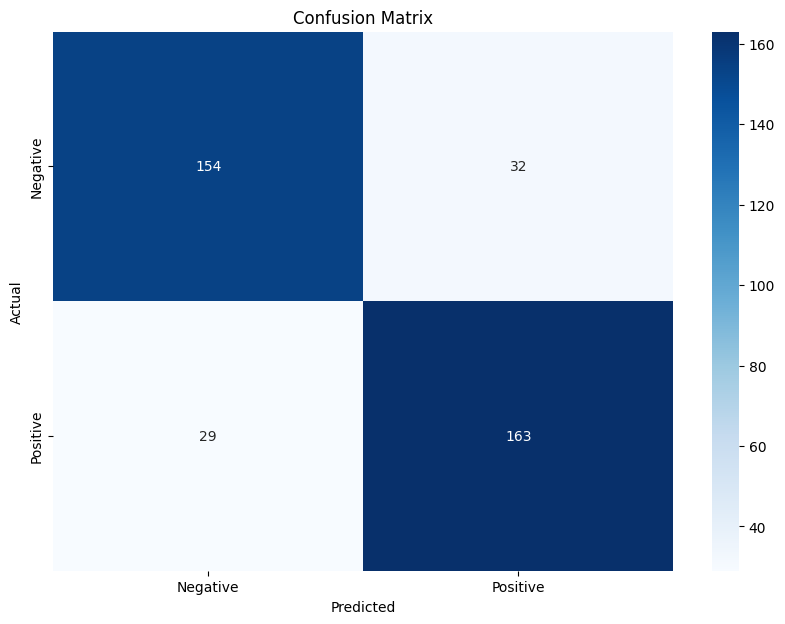


Accuracy: 0.84


In [ ]:
import pandas as pd
import re
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
import logging


# Suppress specific warning messages
warnings.filterwarnings("ignore")


# Set logging level for transformers and other libraries
logging.basicConfig(level=logging.ERROR)


# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class NewsDataset(Dataset):
    def __init__(self, headlines, labels, tokenizer, max_len):
        self.headlines = headlines
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.headlines)

    def __getitem__(self, item):
        headline = str(self.headlines[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            headline,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            truncation=True,  # Explicitly specify truncation
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'headline_text': headline,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

def create_data_loader(headlines, labels, tokenizer, max_len, batch_size):
    ds = NewsDataset(
        headlines=headlines,
        labels=labels,
        tokenizer=tokenizer,
        max_len=max_len
    )

    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=4
    )

BATCH_SIZE = 16
MAX_LEN = 128

train_data_loader = create_data_loader(train_headlines, y_train, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(test_headlines, y_test, tokenizer, MAX_LEN, BATCH_SIZE)

# Define device here, before it is used
EPOCHS = 15
PATIENCE = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Model
class NewsClassifier(nn.Module):
    def __init__(self, n_classes):
        super(NewsClassifier, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=n_classes)

    def forward(self, input_ids, attention_mask):
        return self.bert(input_ids=input_ids, attention_mask=attention_mask)

model = NewsClassifier(n_classes=2)
model = model.to(device)

# Optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=1e-5)

# Define the total number of training steps
total_steps = len(train_data_loader) * EPOCHS

# Define the learning rate scheduler with a warm-up period
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1 * total_steps),  # Warm-up for 10% of the steps
    num_training_steps=total_steps
)

# Define the loss function
loss_fn = nn.CrossEntropyLoss().to(device)

# Training function
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()

    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs.logits, dim=1)
        loss = loss_fn(outputs.logits, labels)

        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

# Evaluation function
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()

    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, preds = torch.max(outputs.logits, dim=1)
            loss = loss_fn(outputs.logits, labels)

            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)

EPOCHS = 15
PATIENCE = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_loss = float('inf')
best_accuracy = 0
best_model = None
patience_counter = 0

# Training loop with early stopping
for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(train_headlines)
    )

    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss = eval_model(
        model,
        test_data_loader,
        loss_fn,
        device,
        len(test_headlines)
    )

    print(f'Val loss {val_loss} accuracy {val_acc}')

    # Check for early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        best_accuracy = val_acc
        best_model = model.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= PATIENCE:
        print("Early stopping triggered")
        break

# Load the best model
model.load_state_dict(best_model)

# Evaluation on test set
y_test_pred = []
y_test_true = []

with torch.no_grad():
    for d in test_data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs.logits, dim=1)

        y_test_pred.extend(preds)
        y_test_true.extend(labels)

y_test_pred = torch.stack(y_test_pred).cpu()
y_test_true = torch.stack(y_test_true).cpu()

# Compute and print confusion matrix and classification report
print("\nConfusion Matrix (test):")
cm = confusion_matrix(y_test_true, y_test_pred)
print(cm)

print("\nClassification Report (test):")
print(classification_report(y_test_true, y_test_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test_true, y_test_pred)
print(f"\nAccuracy: {accuracy:.2f}")


# Cross-Validation on BERT Model

Fold 1/5
Epoch 1/20
----------
Train loss 0.7312112590099903 accuracy 0.5201342281879194
Val loss 0.6890723824501037 accuracy 0.5263157894736842
BEST ACCURACY: 0.5263157894736842
Epoch 2/20
----------
Train loss 0.733033168823161 accuracy 0.5261744966442953
Val loss 0.6920331954956055 accuracy 0.5263157894736842
Epoch 3/20
----------
Train loss 0.7372807289691682 accuracy 0.5134228187919463
Val loss 0.6927916526794433 accuracy 0.5263157894736842
Epoch 4/20
----------
Train loss 0.7313728472019764 accuracy 0.5328859060402684
Val loss 0.6899438977241517 accuracy 0.5263157894736842
Epoch 5/20
----------
Train loss 0.7057093274086079 accuracy 0.5409395973154362
Val loss 0.826993989944458 accuracy 0.513157894736842
Epoch 6/20
----------
Train loss 0.7102115154266357 accuracy 0.5308724832214765
Val loss 0.7257479548454284 accuracy 0.5789473684210527
Epoch 7/20
----------
Train loss 0.677205262031961 accuracy 0.6140939597315436
Val loss 0.7166970014572144 accuracy 0.5657894736842105
Epoch 8/2

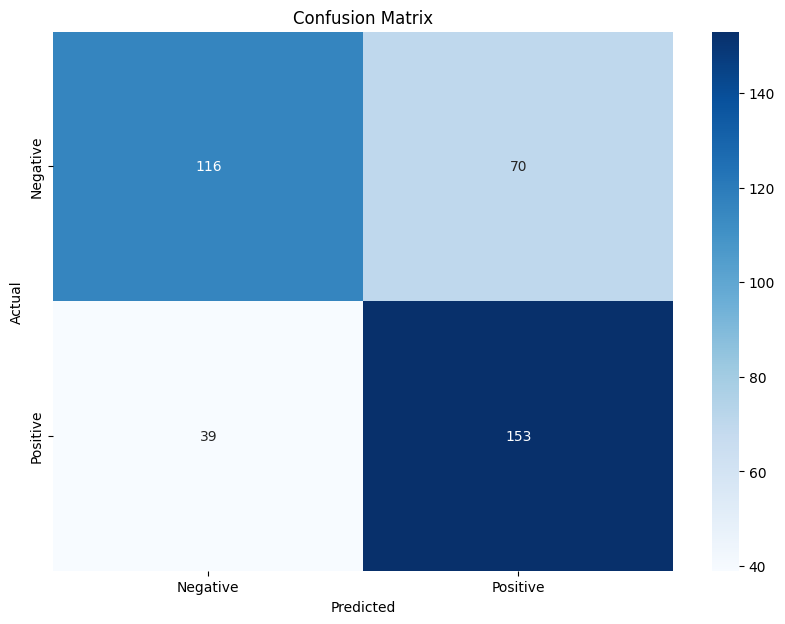


Accuracy: 0.71


In [ ]:
import pandas as pd
import re
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import logging

# Suppress specific warning messages
warnings.filterwarnings("ignore")

# Set logging level for transformers and other libraries
logging.basicConfig(level=logging.ERROR)

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class NewsDataset(Dataset):
    def __init__(self, headlines, labels, tokenizer, max_len):
        self.headlines = headlines
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.headlines)

    def __getitem__(self, item):
        headline = str(self.headlines[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            headline,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            truncation=True,  # Explicitly specify truncation
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'headline_text': headline,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

def create_data_loader(headlines, labels, tokenizer, max_len, batch_size):
    ds = NewsDataset(
        headlines=headlines,
        labels=labels,
        tokenizer=tokenizer,
        max_len=max_len
    )

    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=4
    )


EPOCHS = 20
PATIENCE = 7
BATCH_SIZE = 16
MAX_LEN = 128
N_SPLITS = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class NewsClassifier(nn.Module):
    def __init__(self, n_classes):
        super(NewsClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(p=0.3)
        self.fc1 = nn.Linear(self.bert.config.hidden_size, 256)
        self.batch_norm1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, n_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        cls_output = outputs.pooler_output
        x = self.dropout(cls_output)
        x = self.fc1(x)
        x = self.batch_norm1(x)
        x = torch.relu(x)
        x = self.dropout(x)
        return self.fc2(x)

# Training function
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()

    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, labels)

        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

# Evaluation function
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()

    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, labels)

            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)

# Cross-validation setup
kf_train = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
kf_test = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)


best_overall_accuracy = 0
best_overall_model_state = None

# Iterate through train splits and corresponding test splits
for fold, ((train_index, _), (_, val_index)) in enumerate(zip(kf_train.split(train_headlines, y_train), kf_test.split(test_headlines, y_test))):
    print(f'Fold {fold + 1}/{N_SPLITS}')

    # Split the training data
    X_train_fold, y_train_fold = [train_headlines[i] for i in train_index], y_train[train_index]

    # Split the test data for validation
    X_val_fold, y_val_fold = [test_headlines[i] for i in val_index], y_test[val_index]

    # Create data loaders
    train_data_loader = create_data_loader(X_train_fold, y_train_fold, tokenizer, MAX_LEN, BATCH_SIZE)
    val_data_loader = create_data_loader(X_val_fold, y_val_fold, tokenizer, MAX_LEN, BATCH_SIZE)

    # Initialize model for this fold
    model = NewsClassifier(n_classes=2)
    model = model.to(device)

    # Optimizer and scheduler
    optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=1e-5)
    total_steps = len(train_data_loader) * EPOCHS
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=int(0.1 * total_steps),
        num_training_steps=total_steps
    )
    loss_fn = nn.CrossEntropyLoss().to(device)

    # Training loop with early stopping
    best_loss = float('inf')
    patience_counter = 0
    for epoch in range(EPOCHS):
        print(f'Epoch {epoch + 1}/{EPOCHS}')
        print('-' * 10)

        train_acc, train_loss = train_epoch(
            model,
            train_data_loader,
            loss_fn,
            optimizer,
            device,
            scheduler,
            len(X_train_fold)
        )

        print(f'Train loss {train_loss} accuracy {train_acc}')

        val_acc, val_loss = eval_model(
            model,
            val_data_loader,
            loss_fn,
            device,
            len(X_val_fold)
        )

        print(f'Val loss {val_loss} accuracy {val_acc}')

        # Check for early stopping
        if val_loss < best_loss:
            best_loss = val_loss
            best_accuracy = val_acc
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= PATIENCE:
            print("Early stopping triggered")
            break

        # Track the best overall model
        if best_accuracy > best_overall_accuracy:
            best_overall_accuracy = best_accuracy
            best_overall_model_state = best_model_state
            print(f"BEST ACCURACY: {best_accuracy}")
# Load the best model
model.load_state_dict(best_overall_model_state)

# Evaluation on test set
test_data_loader = create_data_loader(test_headlines, y_test, tokenizer, MAX_LEN, BATCH_SIZE)

y_test_pred = []
y_test_true = []

with torch.no_grad():
    for d in test_data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs, dim=1)

        y_test_pred.extend(preds)
        y_test_true.extend(labels)

y_test_pred = torch.stack(y_test_pred).cpu()
y_test_true = torch.stack(y_test_true).cpu()

# Compute and print confusion matrix and classification report
print("\nConfusion Matrix (test):")
cm = confusion_matrix(y_test_true, y_test_pred)
print(cm)

print("\nClassification Report (test):")
print(classification_report(y_test_true, y_test_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test_true, y_test_pred)
print(f"\nAccuracy: {accuracy:.2f}")


# BERT Model with Custom Classification Head

Epoch 1/20
----------
Train loss 0.7536010558788593 accuracy 0.4868491680085883
Val loss 0.6961039304733276 accuracy 0.5264550264550264
Epoch 2/20
----------
Train loss 0.7475980988934509 accuracy 0.5013419216317767
Val loss 0.7386563097437223 accuracy 0.49206349206349204
Epoch 3/20
----------
Train loss 0.7401566734680762 accuracy 0.4906065485775631
Val loss 0.6710701932509741 accuracy 0.6164021164021164
Epoch 4/20
----------
Train loss 0.7357709789887453 accuracy 0.4927536231884058
Val loss 0.6754147037863731 accuracy 0.5899470899470899
Epoch 5/20
----------
Train loss 0.7112447970952743 accuracy 0.5287171229200215
Val loss 0.6304554703334967 accuracy 0.6534391534391534
Epoch 6/20
----------
Train loss 0.676385878242998 accuracy 0.5759527643585615
Val loss 0.6759116860727469 accuracy 0.5846560846560847
Epoch 7/20
----------
Train loss 0.6079079969825908 accuracy 0.6634460547504025
Val loss 0.5432525860766569 accuracy 0.7407407407407407
Epoch 8/20
----------
Train loss 0.5123400081936

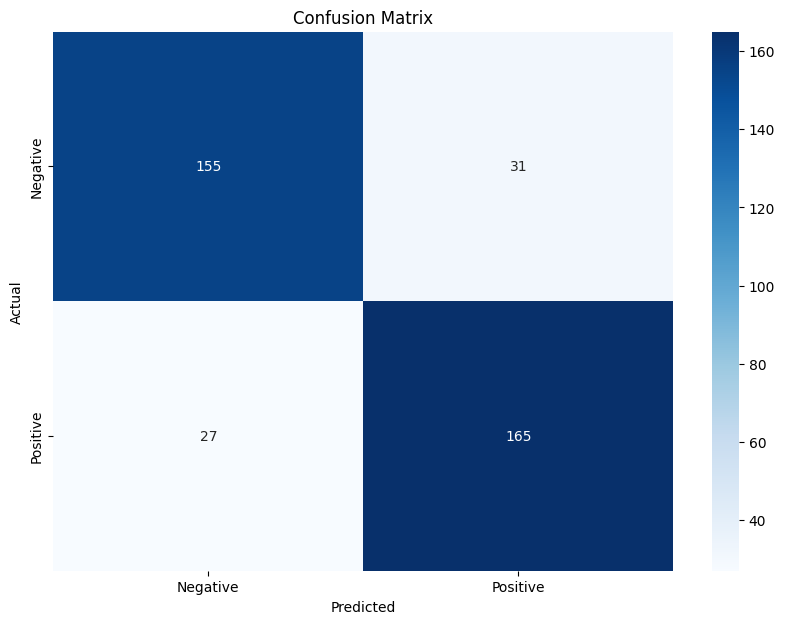


Accuracy: 0.85


In [ ]:
import pandas as pd
import re
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
import logging


# Suppress specific warning messages
warnings.filterwarnings("ignore")


# Set logging level for transformers and other libraries
logging.basicConfig(level=logging.ERROR)


# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class NewsDataset(Dataset):
    def __init__(self, headlines, labels, tokenizer, max_len):
        self.headlines = headlines
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.headlines)

    def __getitem__(self, item):
        headline = str(self.headlines[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            headline,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            truncation=True,  # Explicitly specify truncation
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'headline_text': headline,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

def create_data_loader(headlines, labels, tokenizer, max_len, batch_size):
    ds = NewsDataset(
        headlines=headlines,
        labels=labels,
        tokenizer=tokenizer,
        max_len=max_len
    )

    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=4
    )

BATCH_SIZE = 16
MAX_LEN = 128

train_data_loader = create_data_loader(train_headlines, y_train, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(test_headlines, y_test, tokenizer, MAX_LEN, BATCH_SIZE)


EPOCHS = 20
PATIENCE = 7
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model
class NewsClassifier(nn.Module):
    def __init__(self, n_classes):
        super(NewsClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(p=0.3)
        self.fc1 = nn.Linear(self.bert.config.hidden_size, 256)
        self.batch_norm1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, n_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        cls_output = outputs.pooler_output
        x = self.dropout(cls_output)
        x = self.fc1(x)
        x = self.batch_norm1(x)
        x = torch.relu(x)
        x = self.dropout(x)
        return self.fc2(x)


model = NewsClassifier(n_classes=2)
model = model.to(device)

# Optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=1e-5)

# Define the total number of training steps
total_steps = len(train_data_loader) * EPOCHS

# Define the learning rate scheduler with a warm-up period
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1 * total_steps),  # Warm-up for 10% of the steps
    num_training_steps=total_steps
)

# Define the loss function
loss_fn = nn.CrossEntropyLoss().to(device)

# Training function
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()

    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, labels)

        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

# Evaluation function
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()

    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, labels)

            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)


best_loss = float('inf')
best_accuracy = 0
best_model = None
patience_counter = 0

# Training loop with early stopping
for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(train_headlines)
    )

    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss = eval_model(
        model,
        test_data_loader,
        loss_fn,
        device,
        len(test_headlines)
    )

    print(f'Val loss {val_loss} accuracy {val_acc}')

    # Check for early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        best_accuracy = val_acc
        best_model = model.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= PATIENCE:
        print("Early stopping triggered")
        break

# Load the best model
model.load_state_dict(best_model)

# Evaluation on test set
y_test_pred = []
y_test_true = []

with torch.no_grad():
    for d in test_data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs, dim=1)

        y_test_pred.extend(preds)
        y_test_true.extend(labels)

y_test_pred = torch.stack(y_test_pred).cpu()
y_test_true = torch.stack(y_test_true).cpu()

# Compute and print confusion matrix and classification report
print("\nConfusion Matrix (test):")
cm = confusion_matrix(y_test_true, y_test_pred)
print(cm)

print("\nClassification Report (test):")
print(classification_report(y_test_true, y_test_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test_true, y_test_pred)
print(f"\nAccuracy: {accuracy:.2f}")


# Results
From the exploratory analysis of Models, we can see that traditional models like RadomForestClassifier & Naive Bayes offer great accuracies, around 80% for sentiment prediction of stock movement. More advanced models like LSTM, GRU etc doesn't seem to suit the purpose and provide lower accuracies, hovering around 70%.

Further experimenting with more advanced HuggingFace models for NLP like BERT seems to have promising results. The FinBERT model designed for stock sentiment prediction doesn't seem to suit the purpose, out of the box, and has only less than 50% accuracy. While the BertForSequenceClassification model came back with 84% accuracy. Further tuning the Base BERT model with a custom classification head seemed to improve the accuracy to 85%.

The BERT model has shown promising results, indicating that it’s well-aligned with the objectives of the task. To further enhance its performance, the next steps will involve fine-tuning the hyperparameters and making adjustments to the model’s layers. These refinements are expected to improve the model’s accuracy and overall effectiveness, bringing us closer to optimal outcomes.